<a href="https://colab.research.google.com/github/Drakorgaur/researchs/blob/master/wind_power/ttm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TTM testing on electricity power
## Dataset
[link to dataset](https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting/data)
## Task
Forecast the electricity power generated by wind turbines

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/wind_power.csv', parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])
data.dropna(inplace=True)
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,0.0,58.852308,56.782879,68.210284,...,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,G01,44.80,2.212693
2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,0.0,48.911180,56.033333,68.229411,...,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,G01,49.00,2.130019
2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,0.0,56.859428,55.873937,85.012009,...,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,G01,61.50,2.347810
2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,0.0,56.761226,55.807661,63.945036,...,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,G01,93.25,2.161460
2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,0.0,56.483241,55.451512,21.339981,...,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,G01,138.50,1.913490


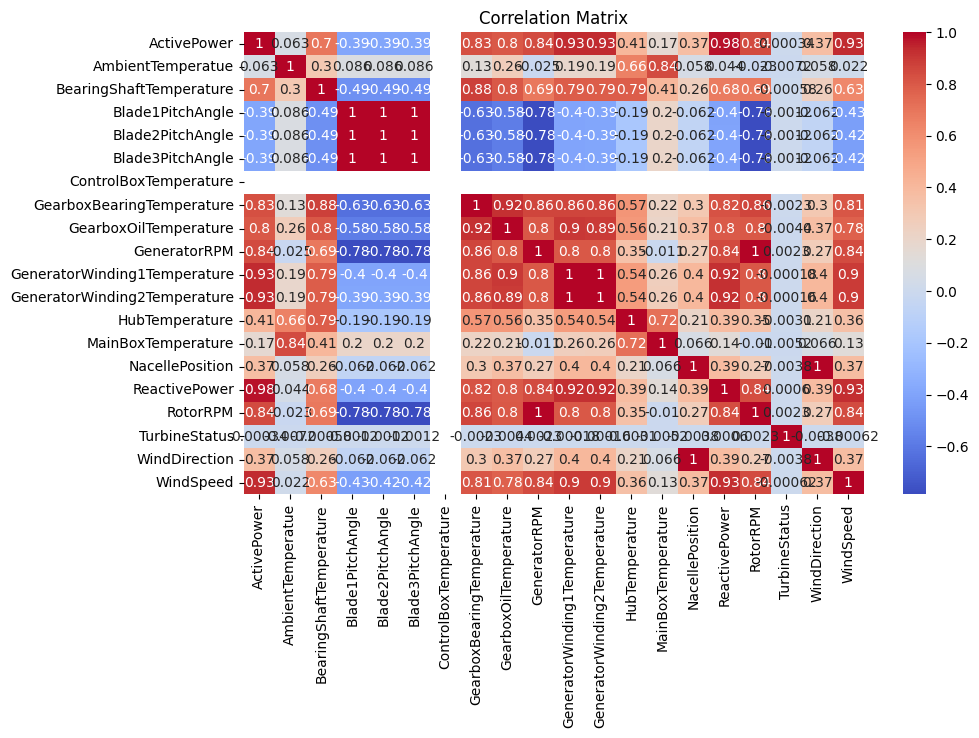

In [ ]:
correlation = data.select_dtypes(include=["float64", "int64"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# select the features, that has correlation with Active Power column more than 0.5
activePower = correlation['ActivePower']
features = correlation[activePower > 0.5].index
features = list(features)
id_cols = features.copy()
id_cols.remove("ActivePower")

In [ ]:
dset = data[features]  # including ActivePower
dset.head()

,ActivePower,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed
2019-05-06 14:10:00+00:00,-7.851491,47.154927,58.852308,56.782879,68.210284,62.792258,62.145290,-15.007223,0.672715,2.212693
2019-05-06 14:30:00+00:00,-5.565284,40.058399,48.911180,56.033333,68.229411,61.747975,61.282616,-10.851533,0.508198,2.130019
2019-05-06 14:50:00+00:00,-5.549332,46.500652,56.859428,55.873937,85.012009,60.785716,60.362536,-10.303578,0.715614,2.347810
2019-05-06 15:00:00+00:00,-5.768376,46.419196,56.761226,55.807661,63.945036,60.277575,59.855694,-12.594477,0.550434,2.161460
2019-05-06 15:10:00+00:00,-5.091456,46.280597,56.483241,55.451512,21.339981,60.004809,59.567618,-11.181515,0.251628,1.913490


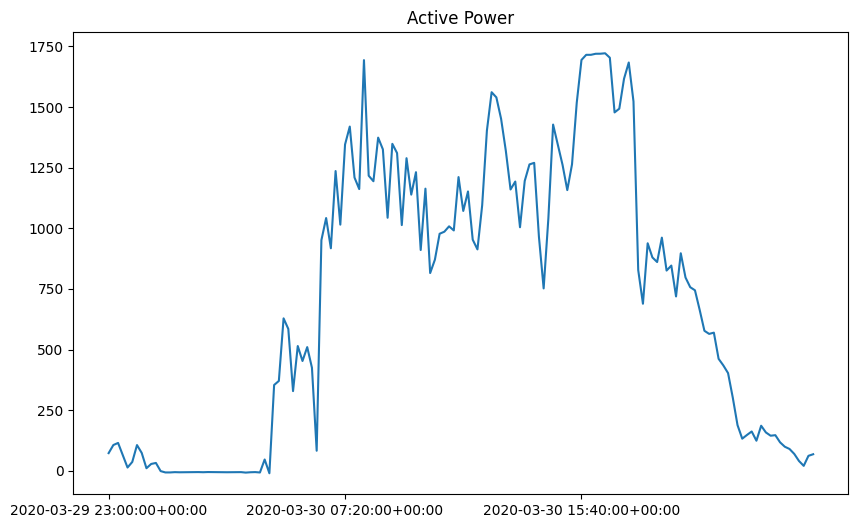

In [ ]:
# plot the ActivePower column
plt.figure(figsize=(10, 6))
plot_data = dset['ActivePower'].tail(150)
plt.plot(plot_data)
plt.xticks(plot_data.index[::50])
plt.title('Active Power')
plt.show()

In [ ]:
!pip install "granite-tsfm[notebooks]" -U

In [ ]:
import os
import tempfile

from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
from transformers import EarlyStoppingCallback, Trainer, TrainingArguments, set_seed
from transformers.integrations import INTEGRATION_TO_CALLBACK

from tsfm_public import TimeSeriesPreprocessor, TrackingCallback, count_parameters, get_datasets
from tsfm_public.toolkit.get_model import get_model
from tsfm_public.toolkit.lr_finder import optimal_lr_finder
from tsfm_public.toolkit.visualization import plot_predictions
from tsfm_public.toolkit.time_series_preprocessor import ScalerType


In [ ]:
TTM_MODEL_PATH = "ibm-granite/granite-timeseries-ttm-r2"
# TTM_MODEL_PATH = "ibm-granite/granite-timeseries-ttm-r1"
# TTM_MODEL_PATH = "ibm-research/ttm-research-r2"

In [ ]:
# Currently supported values are: 512/1024/1536 for Granite-TTM-R2 and Research-Use-TTM-R2, and 512/1024 for Granite-TTM-R1
CONTEXT_LENGTH = 1536

# Granite-TTM-R2 supports forecast length upto 720 and Granite-TTM-R1 supports forecast length upto 96
PREDICTION_LENGTH = 40

# split_config = {
#     "train": [0, 8640],
#     "valid": [8640, 11520],
#     "test": [
#         11520,
#         14400,
#     ],
# }


In [ ]:
# drop index column to column named `time`
TIME_COLUMN = 'time'
dset.reset_index(inplace=True, names=[TIME_COLUMN])
dset[TIME_COLUMN] = pd.to_datetime(dset[TIME_COLUMN])
dset.head(20)

,time,ActivePower,BearingShaftTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,ReactivePower,RotorRPM,WindSpeed
0,2019-05-06 14:10:00+00:00,-7.851491,47.154927,58.852308,56.782879,68.210284,62.792258,62.145290,-15.007223,0.672715,2.212693
1,2019-05-06 14:30:00+00:00,-5.565284,40.058399,48.911180,56.033333,68.229411,61.747975,61.282616,-10.851533,0.508198,2.130019
2,2019-05-06 14:50:00+00:00,-5.549332,46.500652,56.859428,55.873937,85.012009,60.785716,60.362536,-10.303578,0.715614,2.347810
3,2019-05-06 15:00:00+00:00,-5.768376,46.419196,56.761226,55.807661,63.945036,60.277575,59.855694,-12.594477,0.550434,2.161460
4,2019-05-06 15:10:00+00:00,-5.091456,46.280597,56.483241,55.451512,21.339981,60.004809,59.567618,-11.181515,0.251628,1.913490
5,2019-05-06 15:20:00+00:00,-5.542307,41.101336,50.209385,55.566249,76.846603,59.663685,59.206516,-10.514899,0.680123,2.393622
6,2019-05-06 15:40:00+00:00,-5.495585,46.169015,56.451634,55.626587,72.520146,58.750868,58.284742,-10.573747,0.587822,2.321825
7,2019-05-06 15:50:00+00:00,-4.806118,46.116615,56.319311,55.385671,35.470608,58.422778,57.939170,-10.387486,0.350307,1.909285
8,2019-05-06 16:10:00+00:00,-4.561916,40.887303,49.853159,55.074072,5.886983,58.031440,57.506687,-9.831077,0.000000,1.563294
9,2019-05-06 16:20:00+00:00,-4.787421,45.915047,55.918363,54.868806,0.000000,57.852768,57.306624,-10.546541,0.000000,1.479235


In [ ]:
entries = len(dset)
dec_perc = int(entries * 0.1)

split_config = {
    "train": [0, int(entries * 0.8)],
    "valid": [int(entries * 0.8), int(entries * 0.9)],
    "test": [
        int(entries * 0.9),
        entries,
    ],
}

In [ ]:
def zeroshot_eval(dataset_name, batch_size):
    tsp = TimeSeriesPreprocessor(
        timestamp_column=TIME_COLUMN,
        conditional_columns=id_cols,
        target_columns=features,
        context_length=CONTEXT_LENGTH,
        prediction_length=PREDICTION_LENGTH,
        scaling=True,
        scaler_type=ScalerType.STANDARD.value,
    )

    dset_train, dset_valid, dset_test = get_datasets(tsp, dset, split_config)

    # Load model
    zeroshot_model = get_model(
        TTM_MODEL_PATH,
        context_length=CONTEXT_LENGTH,
        prediction_length=PREDICTION_LENGTH,
        freq_prefix_tuning=None,
        freq=None,
        prefer_l1_loss=False,
        prefer_longer_context=True,
    )

    temp_dir = tempfile.mkdtemp()
    # zeroshot_trainer
    zeroshot_trainer = Trainer(
        model=zeroshot_model,
        args=TrainingArguments(
            output_dir=temp_dir,
            per_device_eval_batch_size=batch_size,
            report_to="none",
        ),
    )
    # evaluate = zero-shot performance
    print("+" * 20, "Test MSE zero-shot", "+" * 20)
    zeroshot_output = zeroshot_trainer.evaluate(dset_test)
    print(zeroshot_output)

    # get predictions

    predictions_dict = zeroshot_trainer.predict(dset_test)

    predictions_np = predictions_dict.predictions[0]

    print(predictions_np.shape)

    # get backbone embeddings (if needed for further analysis)

    backbone_embedding = predictions_dict.predictions[1]

    print(backbone_embedding.shape)

    # plot
    plot_predictions(
        model=zeroshot_trainer.model,
        dset=dset_test,
        plot_dir=os.path.join('output', dataset_name),
        plot_prefix="test_zeroshot",
        indices=[685, 118, 902, 1984, 894, 967, 304, 57, 265, 1015],
        channel=0,
    )

In [ ]:
zeroshot_eval(dataset_name='wind_prediction', batch_size=64)

ValueError: A column name should appear only once in `target_columns`, `observable_colums`, `control_columns`, `conditional_columns`, `categorical_columns`, and `static_categorical_columns`.

In [ ]:
import math


def fewshot_finetune_eval(
        dataset_name,
        batch_size,
        learning_rate=None,
        context_length=512,
        forecast_length=96,
        fewshot_percent=5,
        freeze_backbone=True,
        num_epochs=50,
        save_dir='output',
        loss="mse",
        quantile=0.5,
):
    out_dir = os.path.join(save_dir, dataset_name)

    print("-" * 20, f"Running few-shot {fewshot_percent}%", "-" * 20)

    # Data prep: Get dataset

    tsp = TimeSeriesPreprocessor(

        timestamp_column=TIME_COLUMN,
        conditional_columns=id_cols,
        target_columns=['ActivePower'],
        context_length=context_length,
        prediction_length=forecast_length,
        scaling=True,
        encode_categorical=False,
        scaler_type="standard",
    )

    dset_train, dset_val, dset_test = get_datasets(
        tsp, dset, split_config, fewshot_fraction=fewshot_percent / 100, fewshot_location="first"
    )

    # change head dropout to 0.7 for ett datasets
    if "ett" in dataset_name:
        finetune_forecast_model = get_model(
            TTM_MODEL_PATH,
            context_length=context_length,
            prediction_length=forecast_length,
            freq_prefix_tuning=None,
            freq=None,
            prefer_l1_loss=False,
            prefer_longer_context=True,
            # Can also provide TTM Config args
            head_dropout=0.7,
            loss=loss,
            quantile=quantile,
        )
    else:
        finetune_forecast_model = get_model(
            TTM_MODEL_PATH,
            context_length=context_length,
            prediction_length=forecast_length,
            freq_prefix_tuning=None,
            freq=None,
            prefer_l1_loss=False,
            prefer_longer_context=True,
            # Can also provide TTM Config args
            loss=loss,
            quantile=quantile,
        )

    if freeze_backbone:
        print(
            "Number of params before freezing backbone",
            count_parameters(finetune_forecast_model),
        )

        # Freeze the backbone of the model
        for param in finetune_forecast_model.backbone.parameters():
            param.requires_grad = False

        # Count params
        print(
            "Number of params after freezing the backbone",
            count_parameters(finetune_forecast_model),
        )

    # Find optimal learning rate
    # Use with caution: Set it manually if the suggested learning rate is not suitable
    if learning_rate is None:
        learning_rate, finetune_forecast_model = optimal_lr_finder(
            finetune_forecast_model,
            dset_train,
            batch_size=batch_size,
        )
        print("OPTIMAL SUGGESTED LEARNING RATE =", learning_rate)

    print(f"Using learning rate = {learning_rate}")
    finetune_forecast_args = TrainingArguments(
        output_dir=os.path.join(out_dir, "output"),
        overwrite_output_dir=True,
        learning_rate=learning_rate,
        num_train_epochs=num_epochs,
        do_eval=True,
        evaluation_strategy="epoch",
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        dataloader_num_workers=8,
        report_to="none",
        save_strategy="epoch",
        logging_strategy="epoch",
        save_total_limit=1,
        logging_dir=os.path.join(out_dir, "logs"),  # Make sure to specify a logging directory
        load_best_model_at_end=True,  # Load the best model when training ends
        metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
        greater_is_better=False,  # For loss
    )

    # Create the early stopping callback
    early_stopping_callback = EarlyStoppingCallback(
        early_stopping_patience=10,  # Number of epochs with no improvement after which to stop
        early_stopping_threshold=1e-5,  # Minimum improvement required to consider as improvement
    )
    tracking_callback = TrackingCallback()

    # Optimizer and scheduler
    optimizer = AdamW(finetune_forecast_model.parameters(), lr=learning_rate)
    scheduler = OneCycleLR(
        optimizer,
        learning_rate,
        epochs=num_epochs,
        steps_per_epoch=math.ceil(len(dset_train) / (batch_size)),
    )

    finetune_forecast_trainer = Trainer(
        model=finetune_forecast_model,
        args=finetune_forecast_args,
        train_dataset=dset_train,
        eval_dataset=dset_val,
        callbacks=[early_stopping_callback, tracking_callback],
        optimizers=(optimizer, scheduler),
    )
    finetune_forecast_trainer.remove_callback(INTEGRATION_TO_CALLBACK["codecarbon"])

    # Fine tune
    finetune_forecast_trainer.train()

    # Evaluation
    print("+" * 20, f"Test MSE after few-shot {fewshot_percent}% fine-tuning", "+" * 20)

    finetune_forecast_trainer.model.loss = "mse"  # fixing metric to mse for evaluation

    fewshot_output = finetune_forecast_trainer.evaluate(dset_test)
    print(fewshot_output)
    print("+" * 60)

    # get predictions

    predictions_dict = finetune_forecast_trainer.predict(dset_test)

    predictions_np = predictions_dict.predictions[0]

    print(predictions_np.shape)

    # get backbone embeddings (if needed for further analysis)

    backbone_embedding = predictions_dict.predictions[1]

    print(backbone_embedding.shape)

    # plot
    plot_predictions(
        model=finetune_forecast_trainer.model,
        dset=dset_test,
        plot_dir=os.path.join('output', dataset_name),
        plot_prefix="test_fewshot",
        indices=[685, 118, 902, 1984, 894, 967, 304, 57, 265, 1015],
        channel=0,
    )

INFO:/usr/local/lib/python3.11/dist-packages/tsfm_public/toolkit/get_model.py:Loading model from: ibm-granite/granite-timeseries-ttm-r2


-------------------- Running few-shot 5% --------------------


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

INFO:/usr/local/lib/python3.11/dist-packages/tsfm_public/toolkit/get_model.py:Model loaded successfully from ibm-granite/granite-timeseries-ttm-r2, revision = 1536-96-r2.
INFO:/usr/local/lib/python3.11/dist-packages/tsfm_public/toolkit/get_model.py:[TTM] context_length = 1536, prediction_length = 96


Number of params before freezing backbone 3081120
Number of params after freezing the backbone 1054560
Using learning rate = 0.001


Epoch,Training Loss,Validation Loss
1,0.215600,0.160816
2,0.161400,0.121735
3,0.129700,0.124926
4,0.112600,0.105157
5,0.103800,0.103994
6,0.097200,0.099925
7,0.093200,0.098475
8,0.088800,0.095891
9,0.086100,0.095676
10,0.084100,0.095904


[TrackingCallback] Mean Epoch Time = 36.56965081258254 seconds, Total Train Time = 2123.948642015457
++++++++++++++++++++ Test MSE after few-shot 5% fine-tuning ++++++++++++++++++++


{'eval_loss': 0.1398441195487976, 'eval_runtime': 62.9633, 'eval_samples_per_second': 51.363, 'eval_steps_per_second': 0.81, 'epoch': 22.0}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(3234, 40, 10)
(3234, 10, 12, 384)


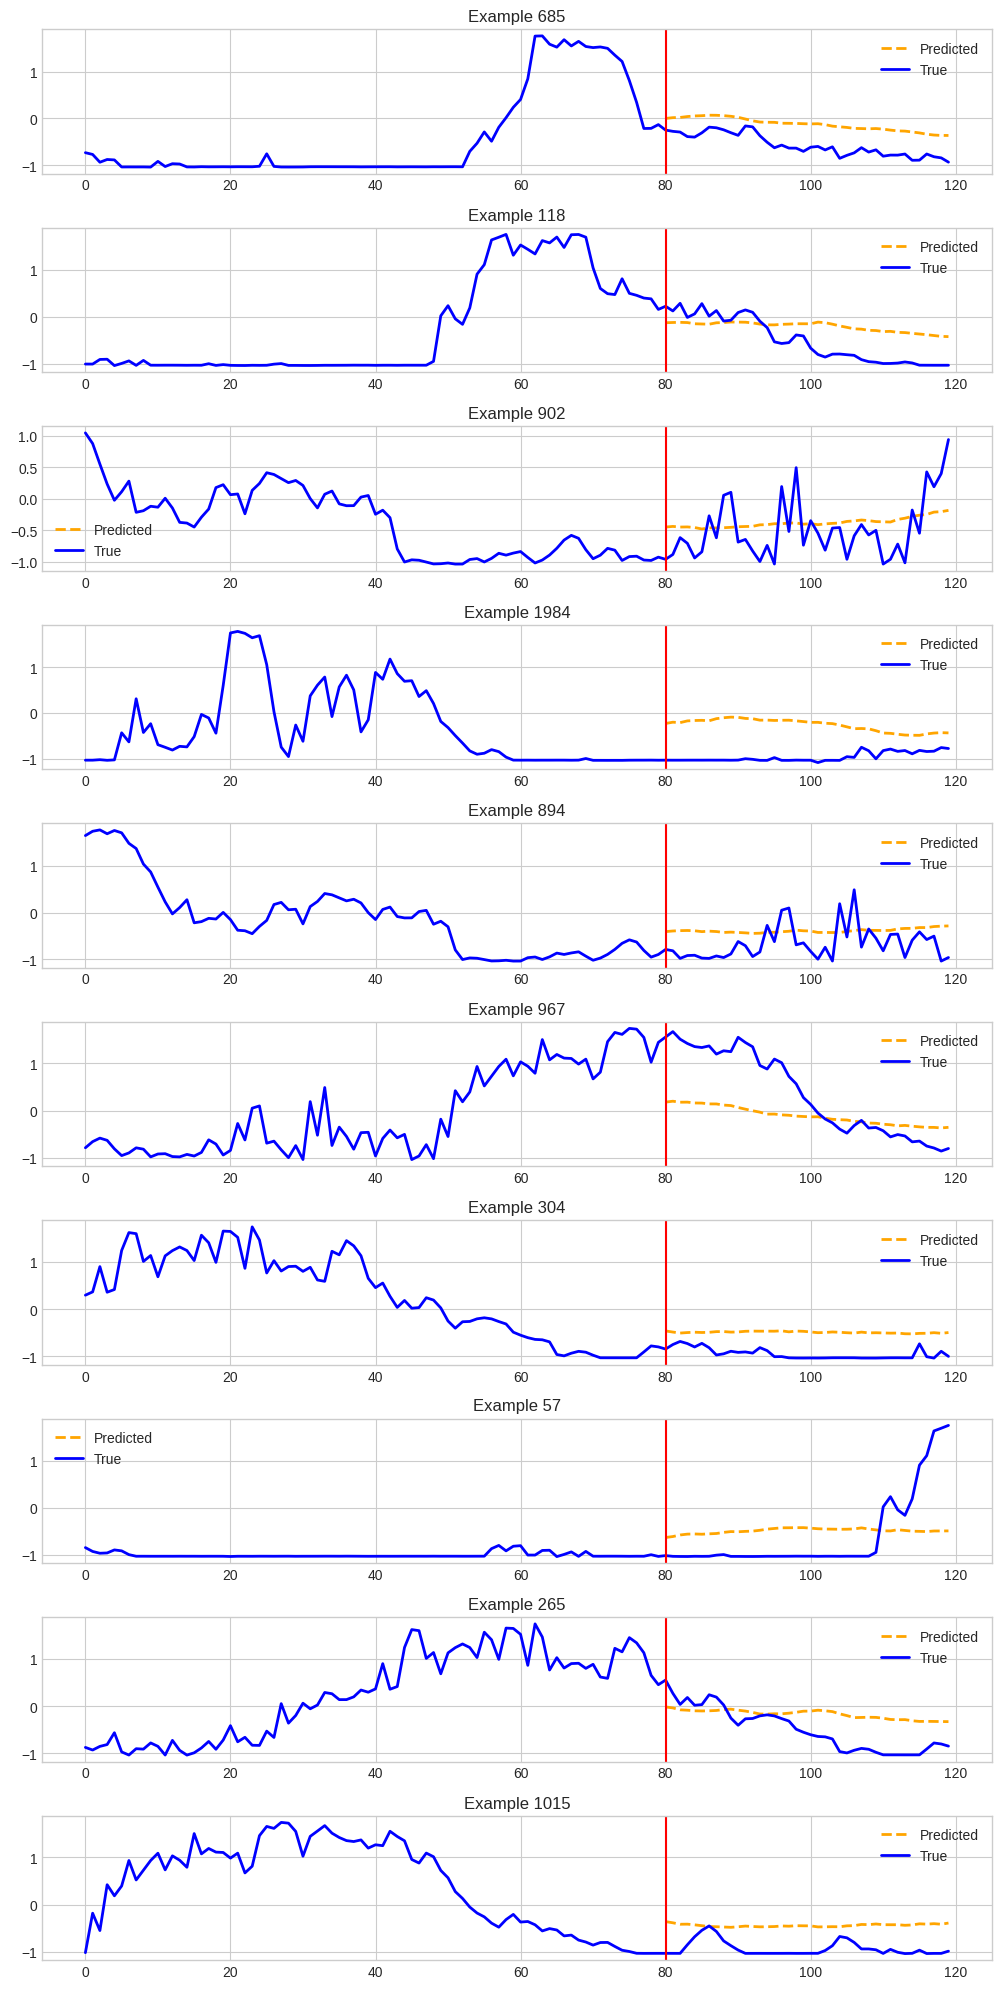

In [ ]:
fewshot_finetune_eval(
    dataset_name='wind_prediction',
    context_length=CONTEXT_LENGTH,
    forecast_length=PREDICTION_LENGTH,
    batch_size=64,
    fewshot_percent=5,
    learning_rate=0.001,
)

In [ ]:
len(dset)